<a href="https://colab.research.google.com/github/Rogerio-mack/Deep-Learning-I/blob/main/T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 

<h1 align=left><font size = 8, style="color:rgb(200,0,0)"><b>Inteligência Artificial</b></font></h1> 
<h1 align=left><font size = 6, style="color:rgb(0,0,0)"><b>Deep Learning</b></font></h1> 

# 2 MLP Modelo Multilayer Perceptron
Professor(a): Rogério de Oliveira

<br>
<br>

---


# Introdução

A construção de modelos com redes Multilayer Perceptron segue no geral os mesmos passos de qualquer modelo de aprendizado supervisionado, e vamos começar aqui explorando um modelo para classificação. De modo bastante geral, depois de definido o problema, temos as seguintes fases na construção de um modelo de aprendizado supervisionado:

* Exploração e Preparação dos Dados
* Separação dos Conjuntos de Treinamento e Teste
* Configuração do Modelo
* Treinamento do Modelo
* Avaliação do Modelo sobre o Conjunto de Teste
* Análise dos Resultados 

Havendo algumas variações alteram ligeiramente esse esquema, como a técnicas de *Cross Validation** para seleção de conjuntos de treinamento e teste, mas que ainda permanece válido de modo geral. 

Nesta trilha você vai empregar esse esquema geral de aprendizado supervisionado para implementar modelos MLP Multilayer Perceptron com `sci-kit learn` para classificação. 

Você vai aprender a construir os modelos MLP e como explorar os resultados desse modelo (pesos da rede, curva de aprendizado). O ajuste desses modelos é uma das tarefas mais desafiadoras da construção de modelos neurais, e você vai aprender aqui alguns dos principais *hiperparâmetros* desses modelos e observar como eles afetam o aprendizado da rede para a seleção dos melhores parâmetros de aprendizado. 

Ao final você terá um roteiro bastante completo para construção de modelos neurais sequenciais com o `Scikit-Learn` mas que será bastante útil para a construção de modelos mais gerais e empregando outros frameworks que virão a seguir.

# Esquema Geral de Aprendizado Supervisionado

Antes de construírmos nossa primeira rede neural, vamos recordar o esquema geral de aprendizado supervisionado do `sci-kit learn`. O `sci-kit learn` implementa o modelo Sequencial, Multilayer Perceptron, nos mesmos moldes de outros modelos supervisionados como árvores de decisão e SVMs.

Para iniciarmos vamos empregar a função `make_moons()` do `sci-kit learn` para gerar um pequeno conjunto de dados com duas classes que empregaremos nos exemplos a seguir. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


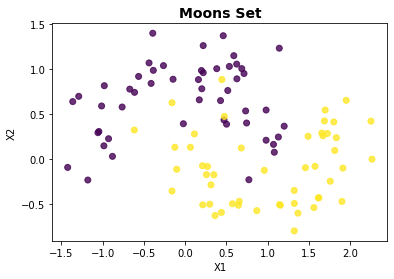

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=1234)

plt.scatter(X[:,0], X[:,1], c=y, alpha=0.8)
plt.title('Moons Set',weight='bold',fontsize=14)
plt.xlabel("X1")
plt.ylabel("X2")

plt.show()


Podemos então implementar um classificador, por exemplo uma árvore de decisão ou uma SVM (comentada abaixo), como segue. 

Primeiramente, despois dos imports das classes a serem empregadas, dividimos nosso conjunto de dados nos **conjuntos de treinamento e teste**. Declaramos em seguida o classificador a ser utilizado seus parâmetros. Fazemos então o treinamento do classificador com a função `fit()`. Podemos agora fazer a predição do conjunto de testes (função `predict()`) e avaliarmos os resultados.

Podemos sumarizar esses passos em:

1. `train_test_split()`
2. model definition
3. train model `fit()`
4. predict test `predict()`
5. check results  `score()`

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1234)

clf = DecisionTreeClassifier(random_state=1234)
# clf = svm.SVC()  

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy on training set: {:.2f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(clf.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.72


O `random_state=1234` é empregado apenas com o objetivo de reprodutibilidade dos resultados, e você ainda pode querer fazer visalizações dos resultados seu resultados.

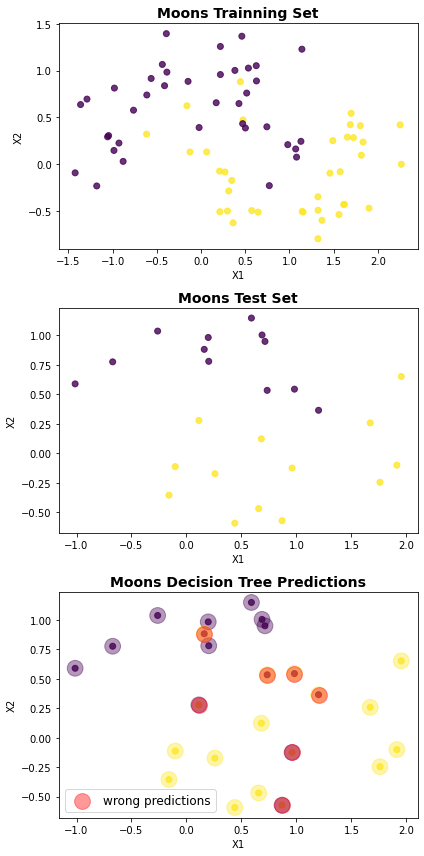

In [ ]:
def show_results(model_name=''):
  plt.figure(figsize=(6,12))
  plt.subplot(3,1,1)
  plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.8)
  plt.title('Moons Trainning Set',weight='bold',fontsize=14)
  plt.xlabel("X1")
  plt.ylabel("X2")

  plt.subplot(3,1,2)
  plt.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.8)
  plt.title('Moons Test Set',weight='bold',fontsize=14)
  plt.xlabel("X1")
  plt.ylabel("X2")

  plt.subplot(3,1,3)
  plt.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.8)
  plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, s=250, alpha=0.4)

  plt.scatter(X_test[y_pred!=y_test,0], X_test[y_pred!=y_test,1], color='red', s=250, alpha=0.4, label='wrong predictions')
  plt.title('Moons ' + model_name + ' Predictions',weight='bold',fontsize=14)
  plt.xlabel("X1")
  plt.ylabel("X2")
  plt.legend(loc='lower left',fontsize=12)

  plt.tight_layout()
  plt.show()

show_results('Decision Tree')


# Aplicando o `MLPClassifier`

O mesmo modelo pode ser aplicado diretamente ao classificador Multi Layer Perceptron do `Scikit-Learn` apenas alterando o classificador. Por exemplo, abaixo, definimos uma rede neural com a função de ativação `tanh` e duas camadas ocultas de 12 neurônios cada. Mais uma vez o `random_state=1234` é empregado apenas para reprodutibilidade dos resultados uma vez que os pesos iniciais da rede são aleatórios.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1234)

mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(12, 12), random_state=1234)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.85
Accuracy on test set: 0.92


E novamente podemos visualizar os resultados da classificação.

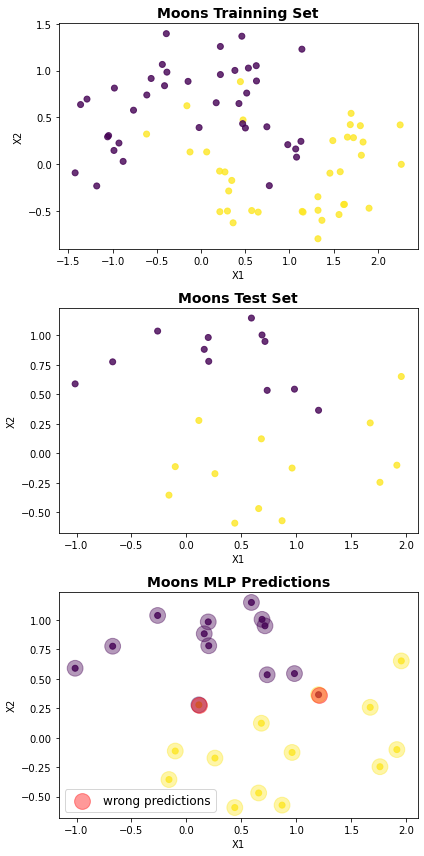

In [ ]:
show_results('MLP')

# Parâmetros do MLP

Vamos explorar alguns parâmetros do nosso classificar MLP. 

1. **hidden_layer_sizes**
Neste parâmetro você pode indicar a quantidade de neurônios nas camadas internas da rede. É uma tupla `()`, mas permite também fornecer uma lista `[]`. O tamanho da lista corresponde ao número de camadas ocultas e, cada posição, contem o número de neurônios da respectiva camada.

Note que as camadas de entrada e saída estão sempre presentes. Não é preciso informar o número de neurônios nessas camadas pois obrigatoriamente eles correspondem a dimensão de *features* (atributos) da variável preditora `X` e da variável objetivo `y`. 

2. **activation**
Aqui você pode especificar a função de ativação das camadas internas da rede entre **‘identity’, ‘logistic’, ‘tanh’, ‘relu’**. O padrão é a **’relu’**.

Note que a função será única para todas as camadas e elementos da rede. Mas você deve lembrar da primeira trilha que a função `relu` não é adequada para camadas de saída. A função da camada de saída não é documentada mas pode ser obtida diretamente nos fontes do `scikit-learn`.

```
# Output for regression
if not is_classifier(self):
    self.out_activation_ = 'identity'
# Output for multi class
elif self._label_binarizer.y_type_ == 'multiclass':
    self.out_activation_ = 'softmax'
# Output for binary class and multi-label
else:
    self.out_activation_ = 'logistic'


```

3. **solver**
Define o otimizador que será empregado. O `Adam` é um otimizar publicado primeiramente em 2014 que combina uma série de técnicas e vem sendo o mais empregado como apdrão, não só pelo `scikit_learn`, mas também por vários outros frameworks como o `TensorFlow` `PyTorch`. 

* ‘sgd’ refere-se ao otimizador do gradiente estocástico 
* ‘adam’ refere-se ao otimizador do gradiente estocástico proposto por Kingma, Diederik, e Jimmy Ba
* ‘lbfgs’ refere-se a uma família de otimizadores quasi-Newton.

O solucionador padrão 'adam' funciona muito bem em conjuntos de dados relativamente grandes (milhares de dados), mas para pequenos conjuntos de dados (como nossos exemplos) prefira o 'lbfgs' que deve convergir mais rapidamente e com desempenho melhor.

4. **learning_rate_init**
A taxa de aprendizado tem como padrão o valor 0.001. Ela por padrão é constante ao longo de todo o treinamento, mas isso pode ser alterado através do parâmetro `learning_rate{‘constant’, ‘invscaling’, ‘adaptive’}` (default=’constant’).

6. **validation_fractionfloat, default=0.1**
Corresponde a porção dos dados que será empregada para validação do treinamento da rede.

Note que você já criou um conjunto de testes. A rigor, conjuntos de testes são para ser empregados após o treinamento do modelo para aferir os seus resultados. Os **conjuntos de validação**, por outro lado, são empregados durante o treinamento para ajustes dos parâmetros do modelo. Enquanto não vemos muita diferença desses conjuntos nos modelos tradicionais, os conjuntos de validação são essenciais no aprendizado de modelos neurais.

5. **max_iterint, default=200**
É o máximo número de iterações do aprendizado e corresponde ao número máximo de épocas de treinamento que será empregado. 

Há ainda o `early_stoppingbool` que define um critério de parada do treinamento baseado na taxa de aprendizado (quando o treinamento não evolui após `nr_iter_no_change`) e muitos outros parâmetros. Para nossos propósitos esses parâmetros são suficientes, mas recomendo que você pesquise outras possibilidades na documentação do `scikit-learn`. 




# Explorando o modelo

Vale a pena explorarmos ainda mais o modelo obtido e não só os resultados da classificação.

## Explorando os pesos do modelo

Os pesos treinados do modelo podem ser obtidos pela propriedade `coefs_` do modelo. Embora não tenhamos acesso direto ao 'significado' desses pesos eles desempenham algum papel em problemas de *transfer learning* e detecção de features.

Note que o `scikit-learn` diferencia os coeficientes lineares dos *intercepts*.

In [ ]:
[coef.shape for coef in mlp.coefs_]

[(2, 12), (12, 12), (12, 1)]

In [ ]:
print("Pesos da Primeira Camada Oculta:")
print(80*'-')
print(mlp.coefs_[0])


Pesos da Primeira Camada Oculta:
--------------------------------------------------------------------------------
[[-0.44334774  0.24796881  0.03897585  0.36974358  0.29422497 -0.17388223
  -0.21749911  0.29028541  0.64448864  0.57928163 -0.06702502  0.16665708]
 [ 0.23340853  0.17881689 -0.29891572  0.00152602 -0.06858192 -0.75301839
   0.41489343  0.614182   -0.31585439  0.00816923 -0.6660208  -0.34162014]]


In [ ]:
print("Pesos para todas as Camadas:")
for i in range(len(mlp.coefs_)):
    print(80*'-')
    number_neurons_in_layer = mlp.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = mlp.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

Pesos para todas as Camadas:
--------------------------------------------------------------------------------
0 0 [-0.44334774  0.23340853], 
0 1 [0.24796881 0.17881689], 
0 2 [ 0.03897585 -0.29891572], 
0 3 [0.36974358 0.00152602], 
0 4 [ 0.29422497 -0.06858192], 
0 5 [-0.17388223 -0.75301839], 
0 6 [-0.21749911  0.41489343], 
0 7 [0.29028541 0.614182  ], 
0 8 [ 0.64448864 -0.31585439], 
0 9 [0.57928163 0.00816923], 
0 10 [-0.06702502 -0.6660208 ], 
0 11 [ 0.16665708 -0.34162014], 

--------------------------------------------------------------------------------
1 0 [-0.19327233 -0.15707456 -0.32648801 -0.21395805  0.11533915 -0.0793652
 -0.30139478  0.36890086  0.23855095 -0.50776736  0.12731165  0.24137542], 
1 1 [ 0.3332683  -0.04937444  0.24581848 -0.26826594 -0.25647611  0.43125815
  0.36019749  0.26900695 -0.10998493 -0.07050539  0.52959285  0.61964418], 
1 2 [ 0.0360437  -0.4254739  -0.14367552 -0.41350078  0.15059878 -0.5613899
 -0.08622482  0.29823887 -0.44046868  0.12936329 

In [ ]:
print("Intercepts da Primeira e Segunda Camadas:")
print(80*'-')
print(mlp.intercepts_[0])
print(80*'-')
print(mlp.intercepts_[1])

Intercepts da Primeira e Segunda Camadas:
--------------------------------------------------------------------------------
[ 0.42884383  0.14810995 -0.18663904  0.32608441 -0.33593201  0.16290586
  0.55861307 -0.07779268  0.30807125 -0.53989074  0.23273353  0.11926715]
--------------------------------------------------------------------------------
[ 0.18122569 -0.07080882  0.3883773   0.18214127 -0.05418367 -0.41140506
 -0.11908187  0.16724718 -0.0318242  -0.21265113  0.07386203 -0.40107837]


Mas, para um grande número de neurônios a inspeção direta dos valores parece se bastante inadequada. 

Podemos então empregar um `heatmap` para 'visualizar' as matrizes de pesos e, assim, melhor explorar possíveis relações dos pesos e features. Note a inversão linha/coluna da matriz na camada de entrada e de saída. **A operação de pesos com as entradas é basicamente um produto de matrizes** a qual aplicamos em seguida a função de ativação.  

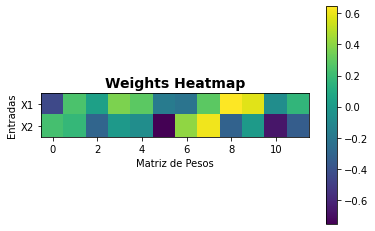

In [ ]:
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')

plt.yticks(range(mlp.coefs_[0].shape[0]), ['X1','X2'])
plt.title('Weights Heatmap', weight='bold',fontsize=14)
plt.xlabel("Matriz de Pesos")
plt.ylabel("Entradas")

plt.colorbar()
plt.show()

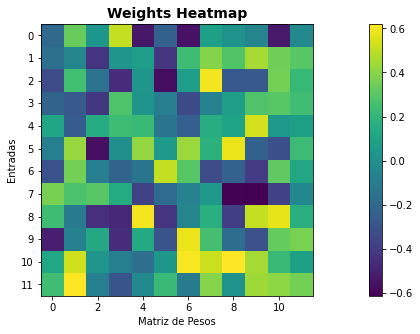

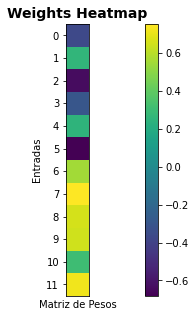

In [ ]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[1], interpolation='none', cmap='viridis')

plt.yticks(range(mlp.coefs_[1].shape[0]), np.arange(0,mlp.coefs_[1].shape[0],1))
plt.title('Weights Heatmap', weight='bold',fontsize=14)
plt.xlabel("Matriz de Pesos")
plt.ylabel("Entradas")
 
plt.colorbar()
plt.show()

plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[2], interpolation='none', cmap='viridis')

plt.yticks(range(mlp.coefs_[2].shape[0]), np.arange(0,mlp.coefs_[2].shape[0],1))
plt.title('Weights Heatmap', weight='bold',fontsize=14)
plt.xlabel("Matriz de Pesos")
plt.ylabel("Entradas")
plt.xticks([]) 

plt.colorbar()
plt.show()



## Fronteira de decisão

Explorar a fronteira de decisão dos modelos de classificação também pode ser útil para compreendermos e compararmos diferentes classificadores. 

A visualização da fronteira só pode ser feita para duas dimensões. Assim, para problemas com mais de duas variáveis preditoras não estaremos de fato visualizando a fronteira *real* de separação dos dados, mas uma projeção, e sempre é possível escolher duas variáveis ou ainda fazer uma projeção sobre os componentes principais dos dados (PCA).

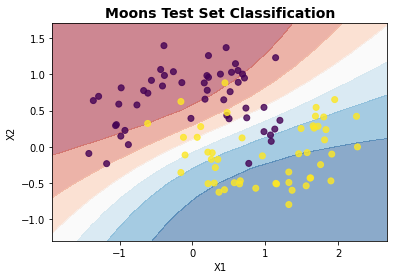

In [ ]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))

if hasattr(mlp, "decision_function"):
  Z = mlp.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
  Z = mlp.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

cm = plt.cm.RdBu
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=0.5)  
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.8)
plt.title('Moons Test Set Classification',weight='bold',fontsize=14)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

## Probabilidades da Classificação

Assim como outros classificadores o MLP também permite empregar o método `precict_proba` e obter no lugar das classes, as probabilidades de cada classe do conjunto. 

Isso pode ser importante de ser analisado (e equivale a observarmos o gradiente de separação das classes no gráfico anterior) e também pode ser empregado para decidir sobre a alteração do `threshold` de separação das classes da função `predict`, por padrão 0.5. 

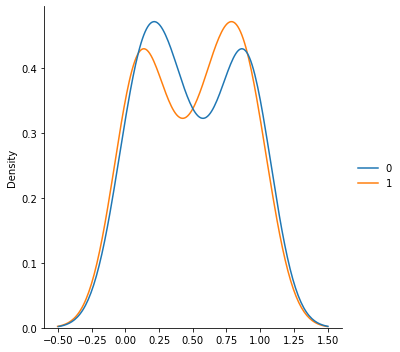

array([[0.07392818, 0.92607182],
       [0.32517796, 0.67482204],
       [0.06046483, 0.93953517],
       [0.88045145, 0.11954855],
       [0.41032912, 0.58967088],
       [0.19990208, 0.80009792],
       [0.83040618, 0.16959382],
       [0.24502775, 0.75497225],
       [0.13499534, 0.86500466],
       [0.34883479, 0.65116521],
       [0.33166995, 0.66833005],
       [0.54295009, 0.45704991],
       [0.92051328, 0.07948672],
       [0.95030605, 0.04969395],
       [0.95709968, 0.04290032],
       [0.04935323, 0.95064677],
       [0.89727327, 0.10272673],
       [0.85125974, 0.14874026],
       [0.65412854, 0.34587146],
       [0.90815462, 0.09184538],
       [0.93933269, 0.06066731],
       [0.26756606, 0.73243394],
       [0.07974136, 0.92025864],
       [0.07599153, 0.92400847],
       [0.62428009, 0.37571991]])

In [ ]:
y_proba = mlp.predict_proba(X_test)

import seaborn as sns
sns.displot(y_proba, kind='kde')
plt.show()

y_proba

## Exibindo a Arquitetura da Rede

O `scikit-learn` não apresenta uma função direta para isso nem parece existir pacotes para isso (embora para `TensorFlow` e `PyTorch` existam algumas soluções). Mas é uma expectativa na maior parte dos iniciantes em modelos neurais 'exibir' a arquitetura da rede construída embora, na verdade, isso tenha pouca utilidade para o desenvolvimento de modelos. Então, você pode achar útil empregar a função abaixo obtida da fonte descrita e alterá-la como achar melhor.

In [ ]:
# source: https://gist.github.com/craffel/2d727968c3aaebd10359
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)


In [ ]:
[coef.shape for coef in mlp.coefs_]

[(2, 12), (12, 12), (12, 1)]

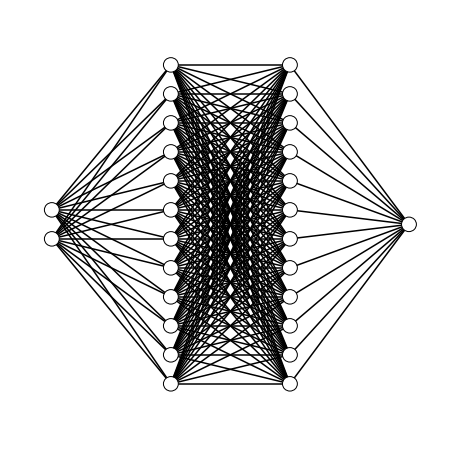

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [2, 12, 12, 1])
# fig.savefig('nn.png')

# Fazendo o *Tunning* do Modelo: Hyperparameters

Um dos grandes desafios dos modelos neurais está em se fazer o *tunning* ou o ajuste de seus parâmetros, como a função de ativação, número de camadas, otimizador etc. Para distinguirmos esses parâmetros dos pesos da rede, também chamados de parâmetros da rede, é comum denominarmos esses parâmetros que controlam o processo de aprendizado de **hiperparâmetros**. Note que otimizar (infelizmente aqui também se emprega essa palavra) esses hiperparâmetros é selecionar os melhores parâmetros para o aprendizado. Embora hajam algumas técnicas para isso não existe aqui um 'otimizador' pronto para isso estando a cargo do desenvolvedor do modelo. 

Vamos então explorar algumas variações dos parâmetros e formas que podemos empregar para a escolha dos hiperparâmetros dos modelo neurais.

## Curva de Aprendizado  

Acompanhar a Curva de Aprendizado ao longo do treinamento, diferente de muitos outros modelos de aprendizado Supervisionado, é particularmente importante nos modelos neurais que apresentam longos períodos de treinamento e apresentam um grande número de parâmetros de ajuste. Desse modo, quase todos os frameworks fornecem um modo para salvar o histórico do treinamento que pode, então, ser analisado dando subsídios para ajustes do modelo.

O `scikit-learn` não apresenta uma função direta para isso ou para exibição dos resultados. Você, então, pode achar útil empregar a função abaixo. Note que precisamos fazer uma pequena mudança no modelo adicionando o parâmetro `early_stopping=True`. Sem esse parâmetro o modelo não irá gerar o histórico dos `validation_scores_` ao longo do treinamento, e esse tipo de situação de setar algum atributo indireto do modelo para gerar esses históricos é bastante comum em outros frameworks também.



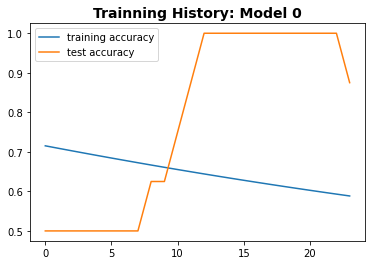

Accuracy on training set: 0.68
Accuracy on test set: 0.68


In [ ]:
def train_history(X,y,model,title=''):

    model.fit(X,y)

    plt.plot(model.loss_curve_, label="training accuracy")
    plt.plot(model.validation_scores_, label="test accuracy")
    plt.title('Trainning History: ' + title, weight='bold', fontsize=14)
    plt.legend()
    plt.show()

mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(12, 12), early_stopping=True, random_state=1234)

train_history(X_train, y_train, mlp, 'Model 0') 
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))  


Esse é um conjunto de dados pequeno e você poderá perceber melhor a utilidade desse gráfico treinando conjuntos de dados maiores. 

Nele você poderá observar a velocidade do treinamento, a taxa de redução do erro e mesmo o **overfitting** do seu modelo (quando ganhos no aprendizado do conjunto de treinamento não encontram correspondência no aprendizado do conjunto de teste). Isso permite que você faça mudanças no modelo e verifique a 'tendência' dessa mudança comportamento do aprendizado. 

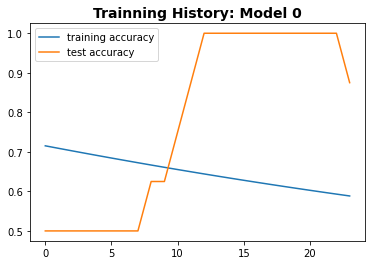

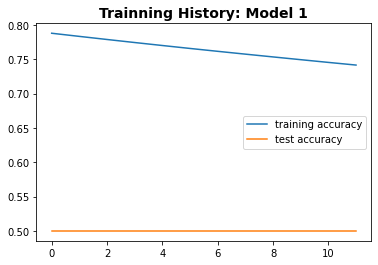

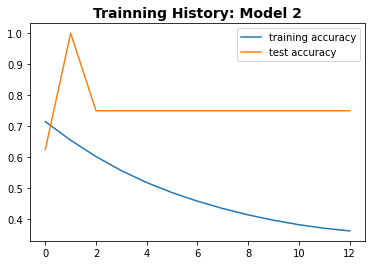

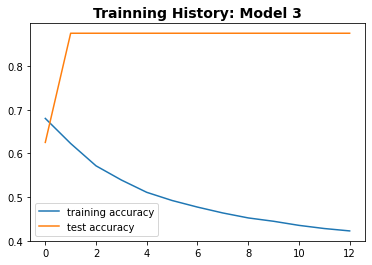

In [ ]:
mlp = MLPClassifier(activation='tanh', 
                    hidden_layer_sizes=(12, 12), 
                    early_stopping=True, 
                    random_state=1234)
train_history(X_train, y_train, mlp, 'Model 0')  

mlp = MLPClassifier(activation='relu',             # change 1
                    hidden_layer_sizes=(12, 12), 
                    early_stopping=True, 
                    random_state=1234)
train_history(X_train, y_train, mlp, 'Model 1')  

mlp = MLPClassifier(activation='tanh', 
                    hidden_layer_sizes=(12, 12), 
                    learning_rate_init=0.01,        # change 2
                    early_stopping=True, 
                    random_state=1234)
train_history(X_train, y_train, mlp, 'Model 2')   

mlp = MLPClassifier(activation='tanh', 
                    hidden_layer_sizes=(8, 32, 8),  # change 3
                    solver='sgd',                   # change 4
                    batch_size=5,                   # change 5
                    early_stopping=True, 
                    random_state=1234)
train_history(X_train, y_train, mlp, 'Model 3')  

Como você pode ver, o melhor resultado final foi obtido com a configuração de hiperparâmetros do modelo 2. Mas, para um conjunto maior de dados podemos observar outros aspectos do treinamento no gráfico e, então, fazer escolhas sobre esses parâmetros.

Você pode também variar os parâmetros programaticamente como abaixo em que exploramos diferentes quantidades de neurônios nas camadas ocultas da rede.

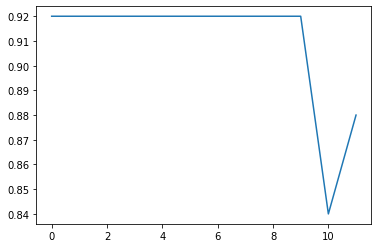

In [ ]:
results = []
for nneurons in range(12,24):
  mlp = MLPClassifier(activation='tanh', 
                      hidden_layer_sizes=(nneurons, nneurons), 
                      learning_rate_init=0.005, 
                      max_iter=1000,
                      random_state=1234)
  mlp.fit(X_train, y_train)
  results.append(mlp.score(X_test, y_test))

plt.plot(results)
plt.show()


# Empregando Dados Reais

Vamos aplicar nosso modelo a dados reais? De fato, nosso exemplo é um exemplo de briquedo e, embora sirva para seus propósitos de entendermos o uso das funções do `scikit-learn`, nada como vermos o comportamente desses modelos com dados mais próximos de dados reais.

## Breast Cancer

Esse é um dataset clássico empregado para *benchmark* de alguns modelos de classificação. Ele traz dados de exames de vários tumores de mama classificados em benignos e malignos.

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): ", cancer.keys())
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['diagnosis'] = pd.Series(cancer.target)
df.head()


cancer.keys():  dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


O emprego do modelo MLP é bastante direto e apenas alteramos aqui as variáveis preditoras e objetivo do modelo que empregamos até agora. Os resultados são bastante bons (0.92 de acuracidade).

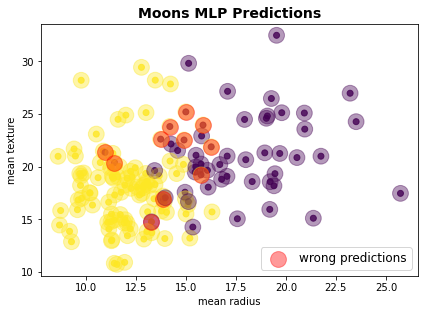

Accuracy on training set: 0.92
Accuracy on test set: 0.92


In [ ]:
X, y = df.drop(columns='diagnosis'), df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1234)

mlp = MLPClassifier(hidden_layer_sizes=[64,128,128,64], random_state=1234)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

plt.figure(figsize=(6,12))
plt.subplot(3,1,3)

x1, x2 = 'mean radius', 'mean texture'

plt.scatter(X_test[x1], X_test[x2], c=y_test, alpha=0.8)
plt.scatter(X_test[x1], X_test[x2], c=y_pred, s=250, alpha=0.4)

plt.scatter(X_test[y_pred!=y_test][x1], X_test[y_pred!=y_test][x2], color='red', s=250, alpha=0.4, label='wrong predictions')
plt.title('Breast Cancer MLP Predictions',weight='bold',fontsize=14)
plt.xlabel(x1)
plt.ylabel(x2)
plt.legend(loc='lower right',fontsize=12)

plt.tight_layout()
plt.show()

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

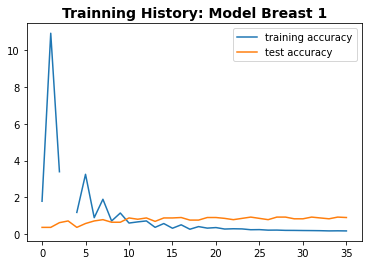

Accuracy on training set: 0.91
Accuracy on test set: 0.89


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=[64,128,128,64], 
                    early_stopping=True, 
                    random_state=1234)
train_history(X_train, y_train, mlp, 'Model Breast 1')  
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Observando o gráfico acima você pode notar que o modelo parece apresentar estabilidade do treinamento a partir da 10a iteração o que sugere que poderíamos parar antecipadamente o treinamento. Deixamos essas e outras explorações desse modelo com você. Aqui vamos fazer uma outra mudança ver os resultados.

# Normalizando os dados

As redes neurais são sensíveis a normalização. Sim, modelos sequencias são sensíveis a normalização e, em geral, alteram os resultados de classificação. Assim, é uma boa prática aplicarmos a normalização dos dados. 

Muitas técnicas podem ser empregadas e o `scikit-learn` possui uma série de funções para isso. Mas aqui é relativamente aplicarmos a normalização e vamos aplicar um `standard scale` dos dados, levando todos para um valor com média 0 e desvio padrão 1.  

In [ ]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

X_train_scaled.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02
mean,-3.791210e-15,4.894363e-16,1.384586e-15,-8.862930e-16,3.139638e-15,6.149228e-16,-3.092206e-16,-1.489419e-16,-1.854607e-15,5.238116e-15,-8.417888e-17,4.790117e-16,9.952263e-17,1.686184e-16,2.038870e-16,1.346862e-15,-6.209821e-16,1.050689e-15,-7.154391e-16,5.300924e-16,-4.441601e-15,1.563173e-15,-3.173844e-15,-1.510659e-15,2.678218e-15,4.753631e-16,4.917819e-16,3.348586e-16,4.823997e-16,7.477065e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.027916e+00,-2.210224e+00,-1.981360e+00,-1.448272e+00,-3.199769e+00,-1.607631e+00,-1.111526e+00,-1.263439e+00,-2.723190e+00,-1.814749e+00,-1.032226e+00,-1.592709e+00,-1.010755e+00,-6.924932e-01,-1.342371e+00,-1.273550e+00,-9.946758e-01,-1.882205e+00,-1.363756e+00,-1.047268e+00,-1.745866e+00,-2.225038e+00,-1.706762e+00,-1.233221e+00,-2.262940e+00,-1.410829e+00,-1.305953e+00,-1.775913e+00,-2.201385e+00,-1.583805e+00
25%,-6.815193e-01,-7.318592e-01,-6.827976e-01,-6.524846e-01,-7.002874e-01,-7.449837e-01,-7.468357e-01,-7.350851e-01,-6.936841e-01,-7.240538e-01,-6.077405e-01,-6.991321e-01,-6.071707e-01,-4.744726e-01,-6.295692e-01,-6.912864e-01,-5.299774e-01,-6.724000e-01,-6.494248e-01,-5.728493e-01,-6.763531e-01,-7.357782e-01,-6.903561e-01,-6.421694e-01,-6.625611e-01,-6.850957e-01,-7.563394e-01,-7.704237e-01,-6.815830e-01,-7.173607e-01
50%,-2.176323e-01,-1.227843e-01,-2.180434e-01,-2.978775e-01,-1.173294e-02,-1.960095e-01,-3.417201e-01,-3.842755e-01,-7.585073e-02,-1.924013e-01,-2.821165e-01,-1.859909e-01,-2.731493e-01,-3.295845e-01,-2.404750e-01,-2.841822e-01,-2.045891e-01,-1.175301e-01,-2.005870e-01,-2.334794e-01,-2.699589e-01,-6.349315e-02,-2.855951e-01,-3.430854e-01,-4.922902e-02,-2.516751e-01,-2.227349e-01,-2.096848e-01,-1.278824e-01,-2.297831e-01
75%,5.372385e-01,5.858015e-01,5.561057e-01,3.772385e-01,6.318682e-01,4.992357e-01,5.408225e-01,6.246613e-01,5.202088e-01,4.698817e-01,2.745072e-01,4.670566e-01,2.408957e-01,9.234579e-02,3.239281e-01,3.608631e-01,2.898849e-01,4.684221e-01,3.710939e-01,2.415685e-01,5.147665e-01,7.099145e-01,5.620429e-01,3.747514e-01,5.476157e-01,5.665849e-01,5.111037e-01,7.163025e-01,4.693585e-01,4.684560e-01
max,3.912368e+00,4.554225e+00,3.911702e+00,5.140782e+00,3.530083e+00,4.515937e+00,4.132737e+00,3.876404e+00,4.462185e+00,4.617052e+00,8.717957e+00,4.847898e+00,9.170839e+00,1.038447e+01,7.565959e+00,5.951391e+00,1.112989e+01,6.586629e+00,7.449335e+00,9.074452e+00,4.097479e+00,3.773568e+00,4.272414e+00,5.916680e+00,3.951719e+00,5.090035e+00,4.589240e+00,2.694635e+00,4.712480e+00,6.650658e+00


Aplicando agora o modelo temos: 

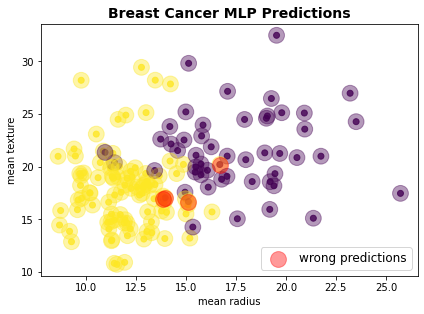

Accuracy on training set: 1.00
Accuracy on test set: 0.97


In [ ]:
mlp_scaled = MLPClassifier(hidden_layer_sizes=[64,128,128,64], random_state=1234)

mlp_scaled.fit(X_train_scaled, y_train)

y_pred = mlp_scaled.predict(X_test_scaled)

plt.figure(figsize=(6,12))
plt.subplot(3,1,3)

x1, x2 = 'mean radius', 'mean texture'

plt.scatter(X_test[x1], X_test[x2], c=y_test, alpha=0.8)
plt.scatter(X_test[x1], X_test[x2], c=y_pred, s=250, alpha=0.4)

plt.scatter(X_test[y_pred!=y_test][x1], X_test[y_pred!=y_test][x2], color='red', s=250, alpha=0.4, label='wrong predictions')
plt.title('Breast Cancer MLP Predictions',weight='bold',fontsize=14)
plt.xlabel(x1)
plt.ylabel(x2)
plt.legend(loc='lower right',fontsize=12)

plt.tight_layout()
plt.show()

print("Accuracy on training set: {:.2f}".format(mlp_scaled.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp_scaled.score(X_test_scaled, y_test)))

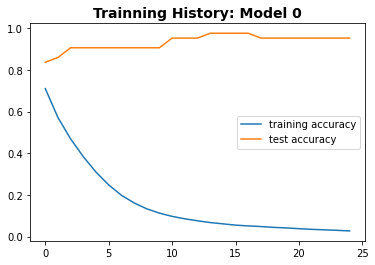

Accuracy on training set: 0.98
Accuracy on test set: 0.98


In [ ]:
mlp_scaled = MLPClassifier(hidden_layer_sizes=[64,128,128,64], 
                    early_stopping=True, 
                    random_state=1234)
train_history(X_train_scaled, y_train, mlp_scaled, 'Model 0') 
print("Accuracy on training set: {:.2f}".format(mlp_scaled.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp_scaled.score(X_test_scaled, y_test)))

e parece termos uma boa curva de aprendizado. 

Por último, somente para exemplo, exibimos a matriz de pesos da camada de entrada relacionada aos atributos de entrada da base e, embora não possamos distringuir aqui qualquer relação e não há de fato uma aplicação direta aqui, essa análise pode ser útil em outros modelos, como os modelos Auto Encoders para a camada de espaço latente do modelo. Mas isso, veremos só mais adiante.

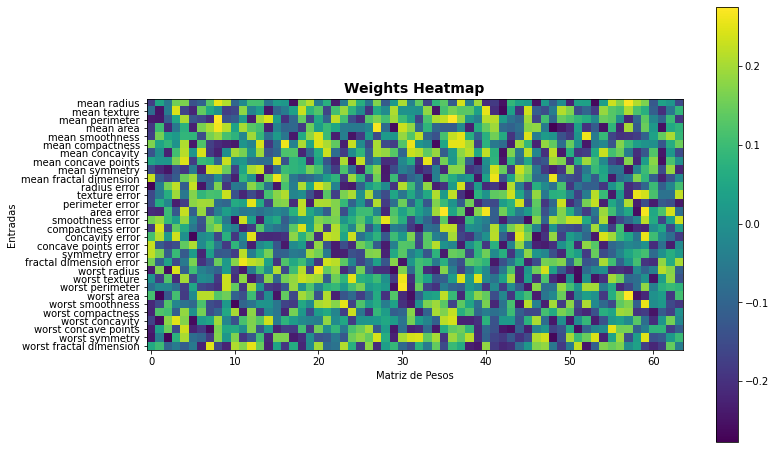

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(mlp_scaled.coefs_[0], interpolation='none', cmap='viridis')

plt.yticks(range(mlp_scaled.coefs_[0].shape[0]), X.columns)
plt.title('Weights Heatmap', weight='bold',fontsize=14)
plt.xlabel("Matriz de Pesos")
plt.ylabel("Entradas")

plt.colorbar()
plt.show()

# Síntese

Aqui você aprendeu como criar em empregar modelos neurais sequencias, MLP Multilayer Perceptron com `sci-kit learn` para problemas de aprendizado supervisionado de classificação. 

Você pode configurar e explorar uma série de parâmetros, **hiperparâmetros**, comuns a muitos modelos neurais, como as **camadas da rede, funções de ativação, otimizador, taxa de aprendizado**. O ajuste desses hiperparâmetros, para buscar os melhores parâmetros para o aprendizado, é um dos grandes desafios dos modelos neurais pois são eles que controlam o processo de aprendizado da rede. Para essa tarefa, você pôde explorar algumas técnicas de seleção de parâmetros e, dentre elas, a **análise da curva de aprendizado** que permitiu a você entender o comportamento do treinamento da rede (velocidade - taxa de aprendizado, evolução sobre o conjunto de treinamento e validação etc.), e aqui também aprendemos a diferenciar os **conjuntos de validação** dos tradicionais **conjuntos de teste** do aprendizado de máquina mais tradicional.

Construímos cada um desses passos e análises em `Python` e com a biblioteca `scikit-learn` e, com isso, você aqui um roteiro bastante completo para construção de modelos neurais sequenciais. Muitas das funções aqui desenvolvidas são bastante gerais, e serão úteis no desenvolvimento dos modelos que virão a seguir, mesmo quando empregarmos outros frameworks como o `TensorFlow` e `PyTorch`.



## Para saber mais

Acesse o site do `scikit-learn` em https://scikit-learn.org/stable/modules/neural_networks_supervised.html e explore os exemplos de modelos supervisionados e as funções do classificador MLP. 



## Referências

1. Goodfellow Ian, Bengio Y., Courville, A.  **Deep Learning** Disponível em: http://www.deeplearningbook.org/ Acesso em: 21 de abril de 2021.

2. ___. **`scikitlearn`** . Disponível em: https://scikit-learn.org/stable/index.html Acesso em: 21 de abril de 2021.

3. Ramsundar, B., Zadeh, R. B. **TensorFlow for Deep Learning** (2016)
, O'Reilly Media, Inc. 

4. Chollet, F. **Deep Learning with Python**. (2018) Manning Publications Co. 

